In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from datetime import datetime
from bokeh.plotting import figure, output_file, show
from bokeh.models import HoverTool
from bokeh.models import Span

In [5]:
disney_full = pd.read_csv('DIS.csv')

In [6]:
disney_full.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1985-01-02,1.233125,1.238263,1.233125,1.235694,0.873995,1707856
1,1985-01-03,1.233125,1.233125,1.222849,1.225418,0.866726,11901470
2,1985-01-04,1.222849,1.222849,1.217711,1.220280,0.863092,3323264
3,1985-01-07,1.225418,1.243401,1.225418,1.235694,0.873995,3381652
4,1985-01-08,1.235694,1.245970,1.230556,1.243401,0.879445,2997263


In [11]:
disney = disney_full[['Date', 'Close']]
disney.Date = pd.to_datetime(disney.Date)
disney['Year'] = pd.DatetimeIndex(disney['Date']).year
disney['t'] = np.arange(1, disney.shape[0] + 1)
disney['ln_y'] = np.log(disney.Close)
disney.head()

<ipython-input-11-87ee3dc90545>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disney['Year'] = pd.DatetimeIndex(disney['Date']).year
<ipython-input-11-87ee3dc90545>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disney['t'] = np.arange(1, disney.shape[0] + 1)
<ipython-input-11-87ee3dc90545>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

,Date,Close,Year,t,ln_y
0,1985-01-02,1.235694,1985,1,0.211633
1,1985-01-03,1.225418,1985,2,0.203282
2,1985-01-04,1.220280,1985,3,0.199080
3,1985-01-07,1.235694,1985,4,0.211633
4,1985-01-08,1.243401,1985,5,0.217850


## Ежедневные данные

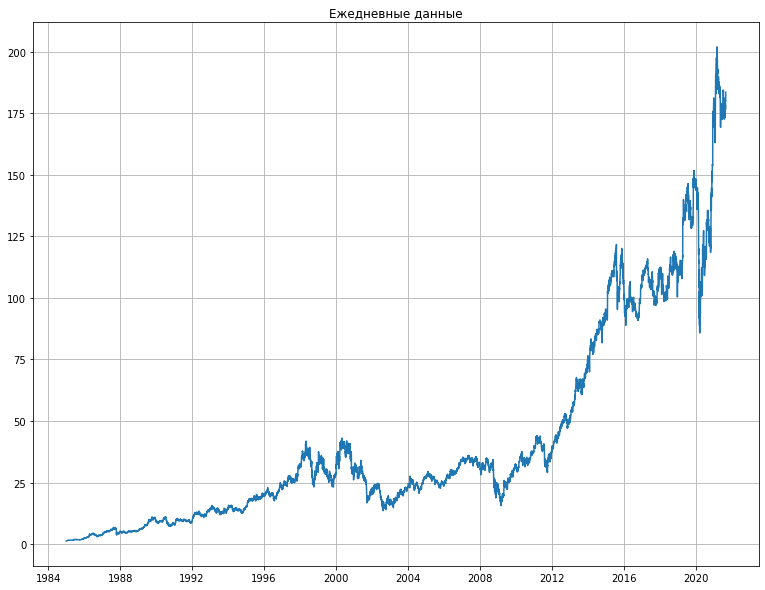

In [13]:
plt.figure(figsize=(13, 10))
plt.plot(disney.Date, disney.Close)
plt.title('Ежедневные данные')
plt.grid();

## Полулогарифмический график

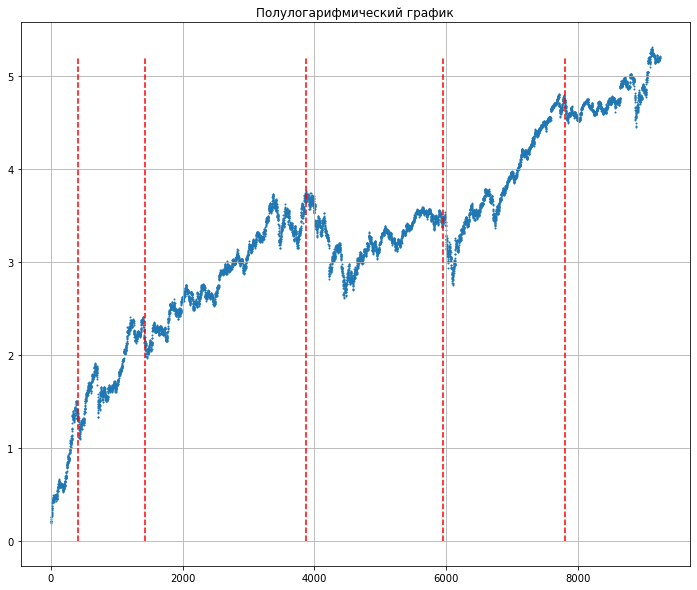

In [143]:
plt.figure(figsize=(12, 10))
plt.scatter(disney.t, np.log(disney.Close), s=1)
plt.title('Полулогарифмический график')
plt.grid()

plt.vlines(415, 0, 5.2, color = 'r', linestyle='--')
plt.vlines(1430, 0, 5.2, color = 'r', linestyle='--')
plt.vlines(3870, 0, 5.2, color = 'r', linestyle='--')
plt.vlines(5950, 0, 5.2, color = 'r', linestyle='--')
plt.vlines(7800, 0, 5.2, color = 'r', linestyle='--');

## График 1/y

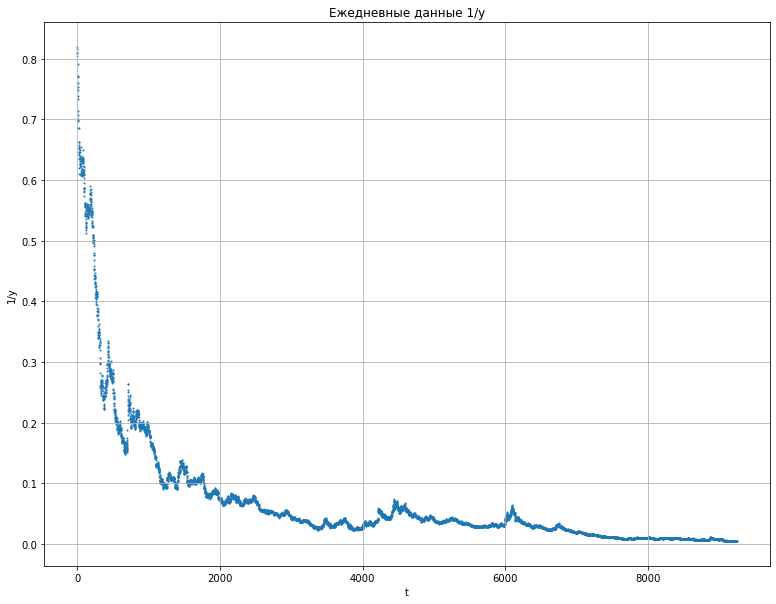

In [115]:
plt.figure(figsize=(13, 10))
plt.scatter(disney.t, 1 / disney.Close, s=1)
plt.title('Ежедневные данные 1/y')
plt.ylabel('1/y')
plt.xlabel('t')
plt.grid();

## Участки завершения интенсивного роста (1/y)

In [120]:
def revers_segment(x1, x2, y2, y1=0): # x в формате '2020-01-01'
    plt.figure(figsize=(13, 10))
    plt.scatter(disney.t, 1 / disney.Close, s=3)
    plt.title('Ежедневные данные 1/y (участок)')
    plt.grid()
    lim = (x1, x2)
    plt.xlim(lim)
    plt.ylim(y1, y2)
    plt.ylabel('1 / y');

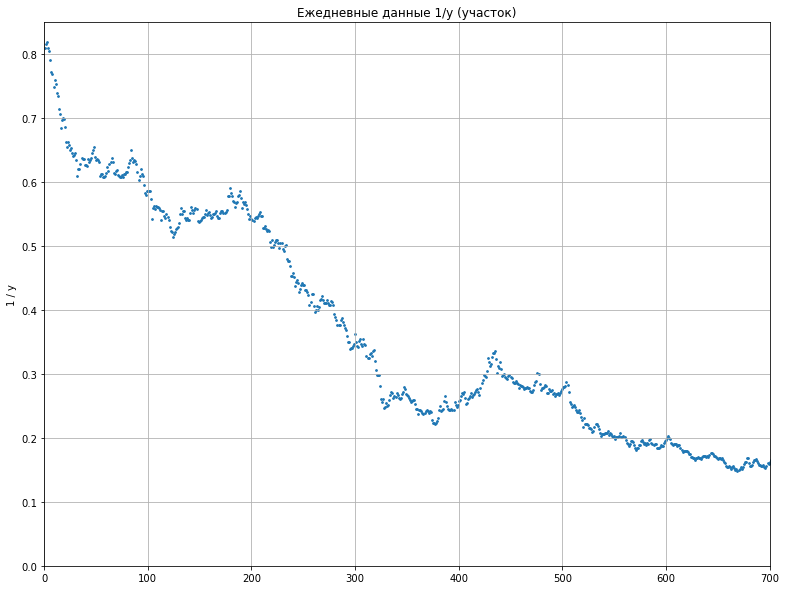

In [121]:
revers_segment(x1=0, x2=700, y2=0.85)

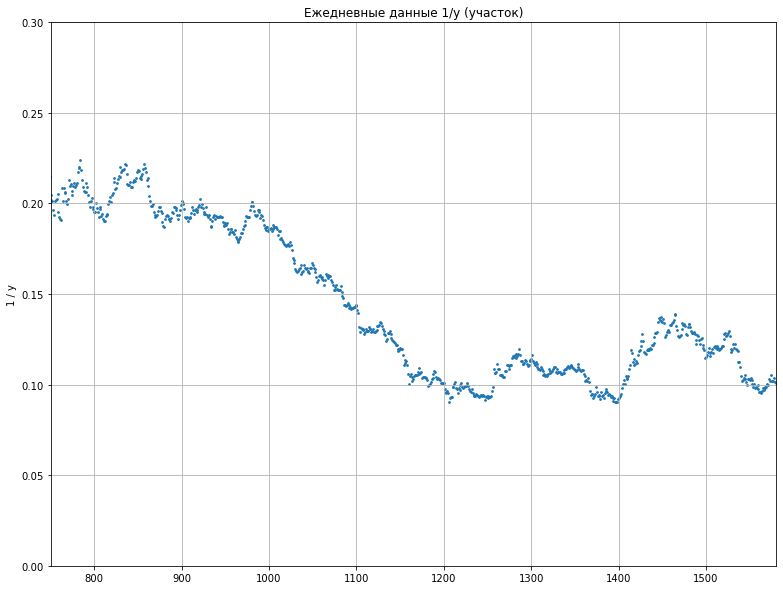

In [122]:
revers_segment(x1=750, x2=1580, y2=0.3)

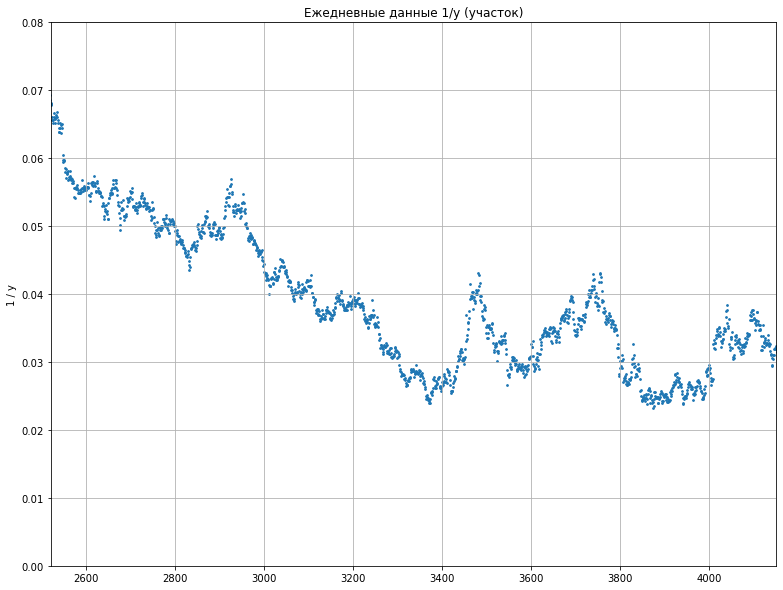

In [123]:
revers_segment(x1=2520, x2=4150, y2=0.08)

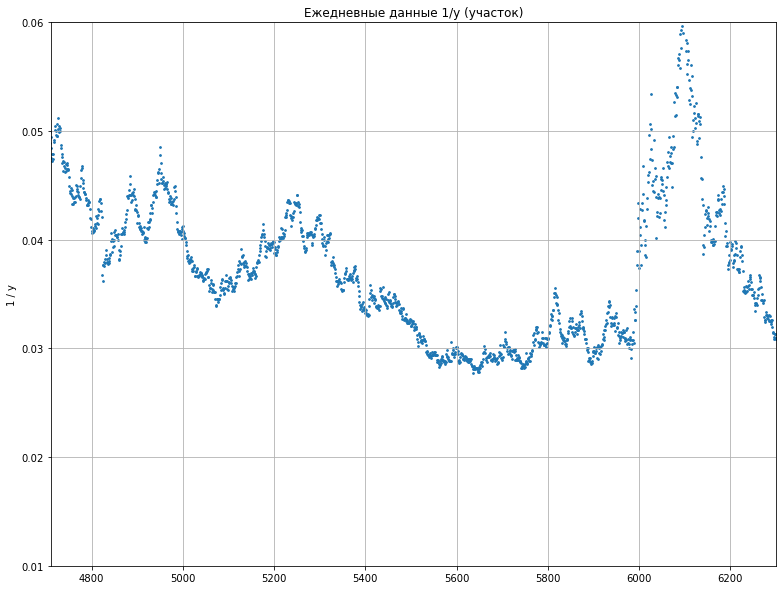

In [124]:
revers_segment(x1=4710, x2=6300, y1=0.01, y2=0.06)

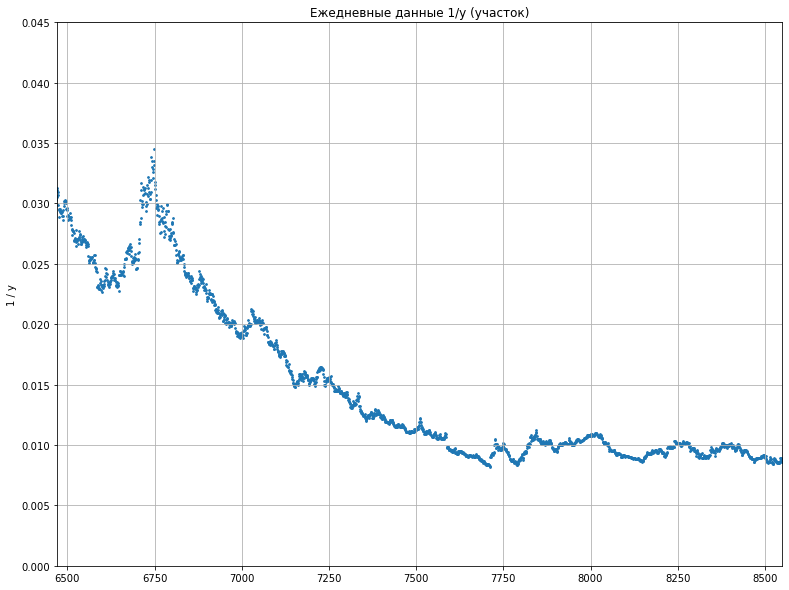

In [125]:
revers_segment(x1=6470, x2=8550, y2=0.045)

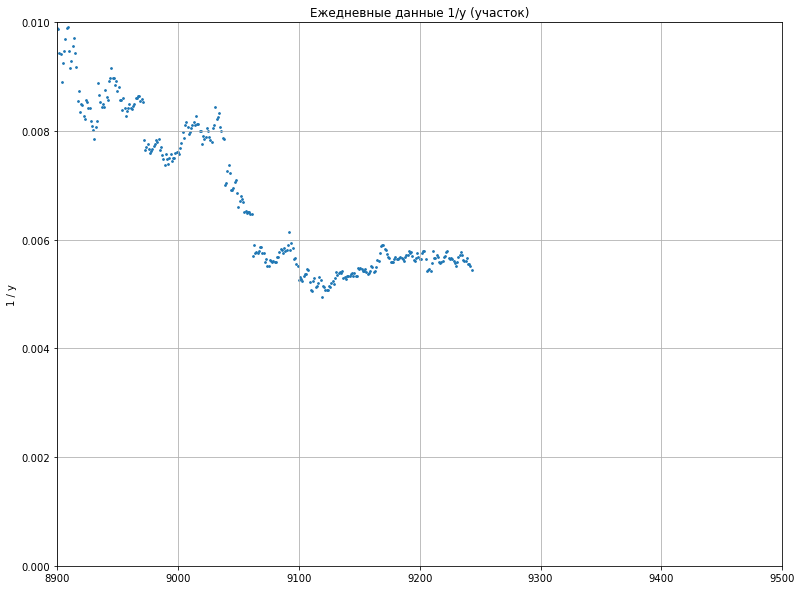

In [146]:
revers_segment(x1=8900, x2=9500, y2=0.01)

## Поиск конца интенсивного роста на участках

In [168]:
def segment_semilog(t0, t1, y2, y1=0): # t0 и t1 в формате '2020-01-01'
    y0 = disney.Close[disney.t == t0].values
    print('y0 = ', y0)
    print('t0 = ', t0)
    print('t1 = ', t1)
    
    plt.figure(figsize=(12, 10))
    plt.scatter((disney.t - t0) ** 2, np.log(disney.Close / y0), s=4)
    plt.grid()
    plt.ylabel('ln(y / y0)')
    plt.xlabel('(t - t0)^2')
    plt.xlim(0, (t1 - t0)** 2 + 10000 * y0)
    plt.vlines((t1 - t0)** 2, -1, 5, color = 'r', linestyle='--')
    plt.ylim(y1, y2);

y0 =  [1.705823]
t0 =  100
t1 =  415


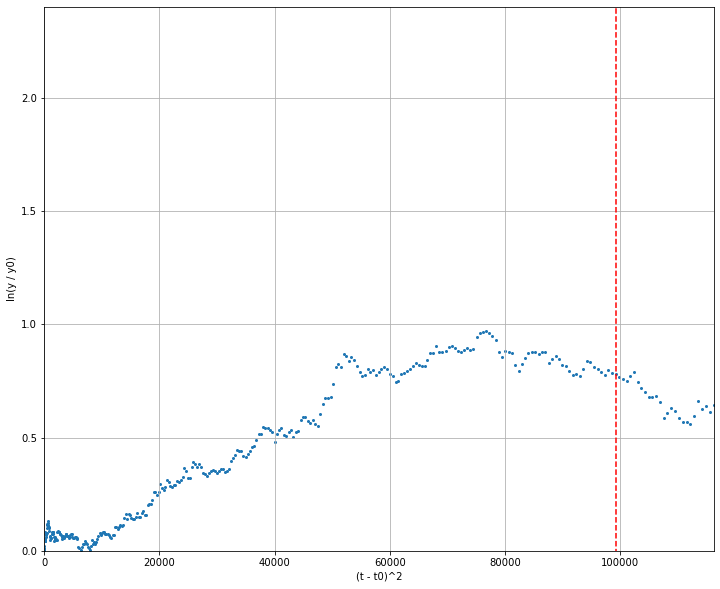

In [169]:
segment_semilog(t0=100, t1=415, y2=2.4)

In [197]:
f'на полулогарифме: {np.log(np.e ** 1.85 * 1.7)}'

'на полулогарифме: 2.3806282510621704'

y0 =  [4.98388]
t0 =  980
t1 =  1430


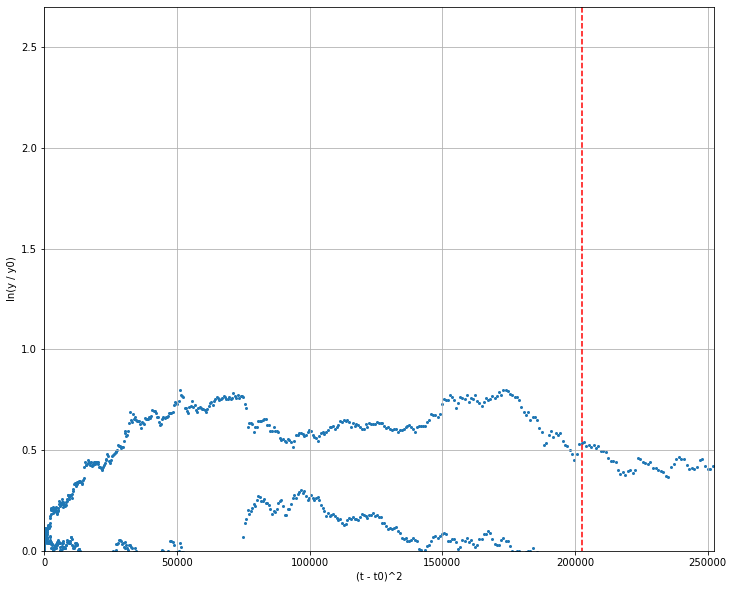

In [201]:
segment_semilog(t0=980, t1=1430, y2=2.5)

In [202]:
f'на полулогарифме: {np.log(np.e ** 2.55 * 4.98)}'

'на полулогарифме: 4.155429891036561'

y0 =  [35.189999]
t0 =  6800
t1 =  7800


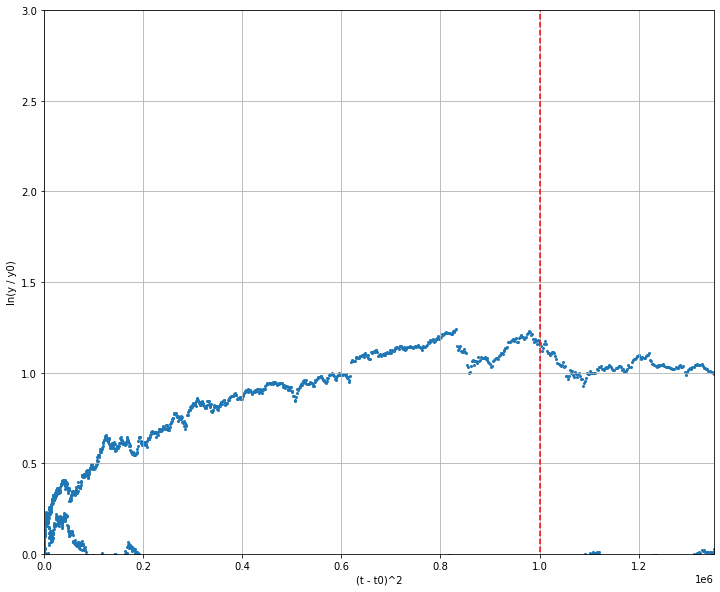

In [181]:
segment_semilog(t0=6800, t1=7800, y2=3);

In [198]:
f'на полулогарифме: {np.log(np.e ** 1.5 * 35)}'

'на полулогарифме: 5.055348061489414'

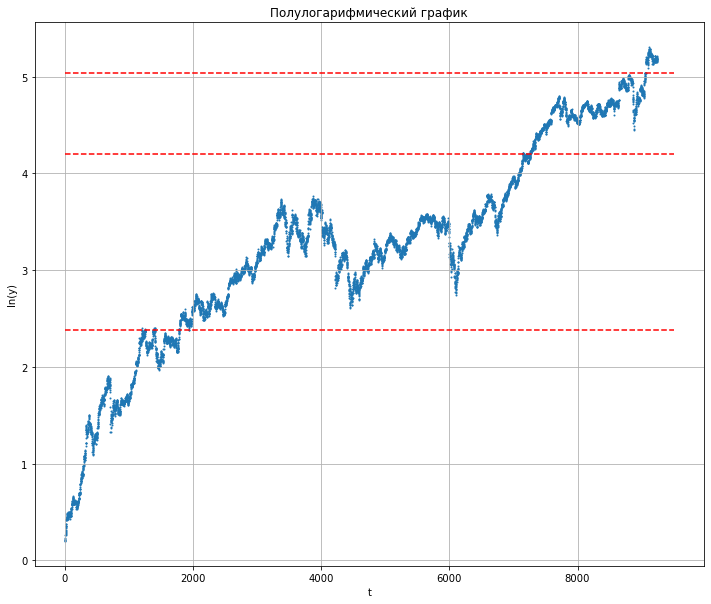

In [222]:
plt.figure(figsize=(12, 10))
plt.scatter(disney.t, np.log(disney.Close), s=1)
plt.title('Полулогарифмический график')
plt.grid()

plt.hlines(2.38, 0, 9500, color = 'r', linestyle='--')
plt.hlines(4.2, 0, 9500, color = 'r', linestyle='--')
plt.hlines(5.04, 0, 9500, color = 'r', linestyle='--')

plt.ylabel('ln(y)')
plt.xlabel('t');

### Спрямление

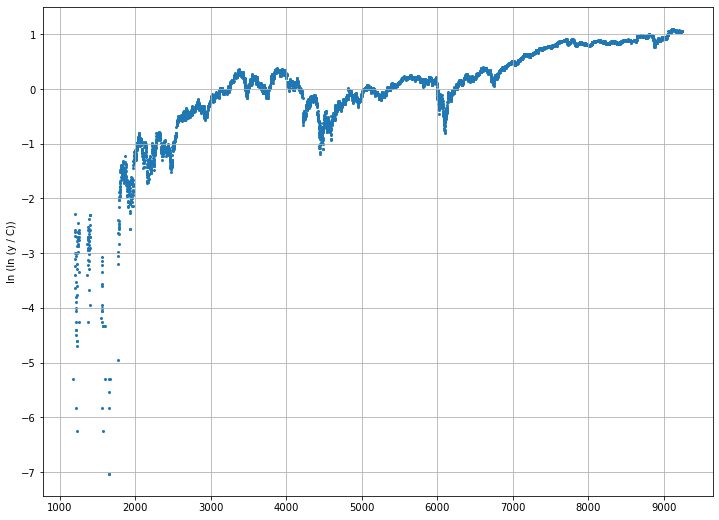

In [308]:
plt.figure(figsize=(12, 9))
plt.scatter(disney.t, np.log(np.log(disney.Close / 10)), s=4)
plt.ylabel('ln (ln (y / C))')
plt.grid();

## Графики с накопленной суммой y и нач. значениями y*
### ln(y*/y_накоп) от t

In [224]:
y_cumsum = disney.Close.cumsum()

In [261]:
def segment_log_ycs_y(t1, t2, y1, y2=0):
    plt.figure(figsize=(12, 10))
    plt.scatter(disney.t, np.log(disney.Close / y_cumsum), s=2)
    plt.grid()
    plt.ylabel('ln(y*/y)')
    plt.xlabel('t')
    plt.xlim(t1, t2)
    plt.ylim(y1, y2);

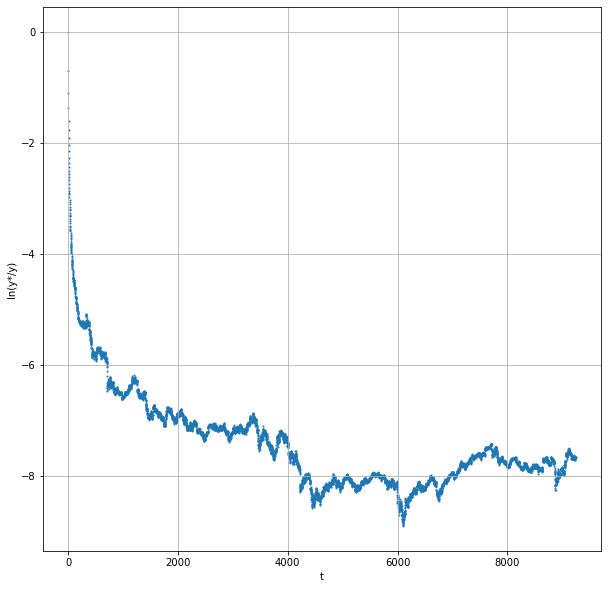

In [260]:
# по всем данным
plt.figure(figsize=(10, 10))
plt.scatter(disney.t, np.log(disney.Close / y_cumsum), s=1)
plt.grid()
plt.ylabel('ln(y*/y)')
plt.xlabel('t');
#plt.ylim(-9, -4);

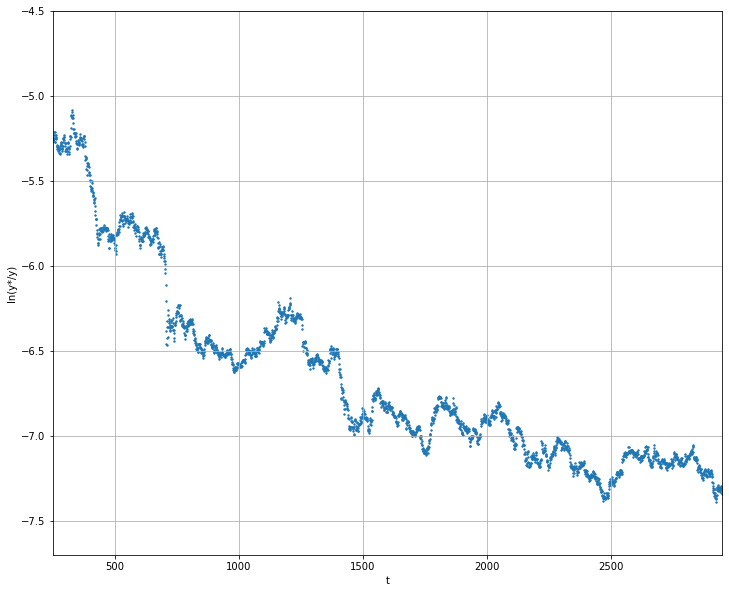

In [269]:
segment_log_ycs_y(t1=250, t2=2950, y1=-7.7, y2=-4.5)

k = 2/2071 = 0.0009  
log(0.0009) = -7.013  
t* = 1992-01-01

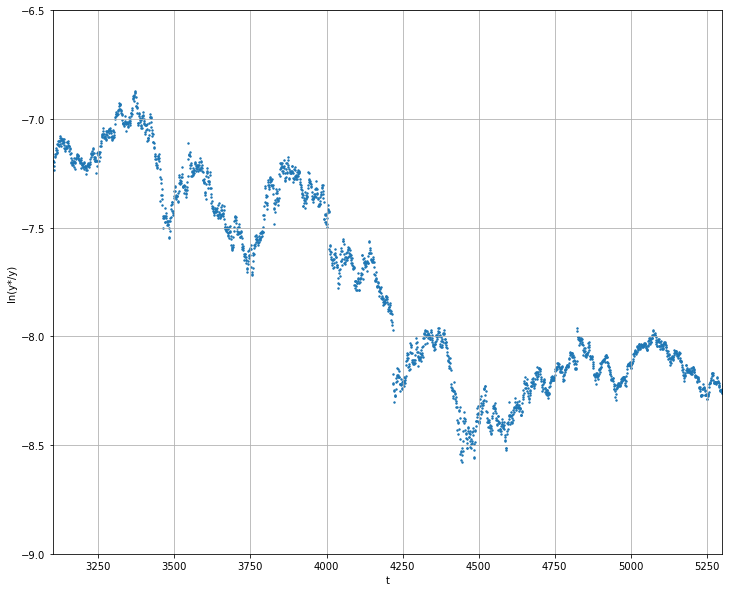

In [276]:
segment_log_ycs_y(t1=3100, t2=5300, y1=-9, y2=-6.5)

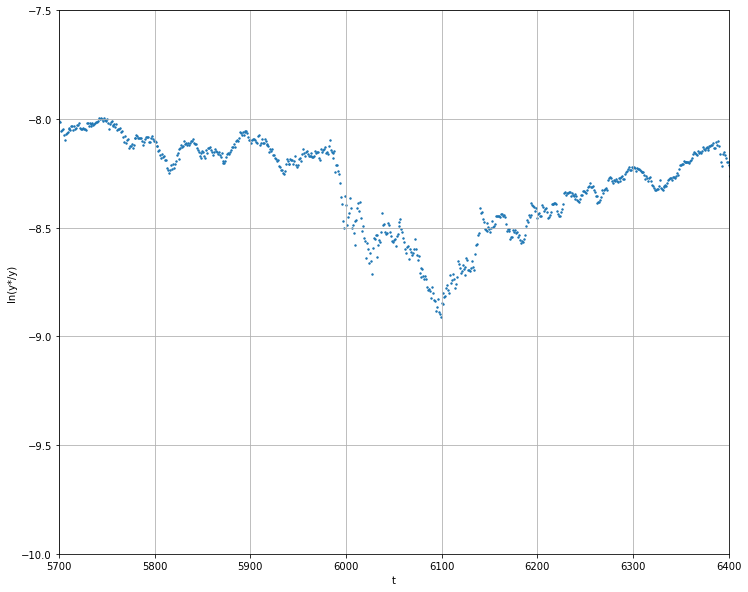

In [281]:
segment_log_ycs_y(t1=5700, t2=6400, y1=-10, y2=-7.5)

нижний:  
k = 1/1430 = 0.00069  
log(0.00069) = -7.278  
t* = 1997-10-01

верхний:  
k = 1/1308 = 0.00076  
log(0.00076) = -7.18  
t* = 2000-03-01

### y*/y_накоп от ln y_накоп

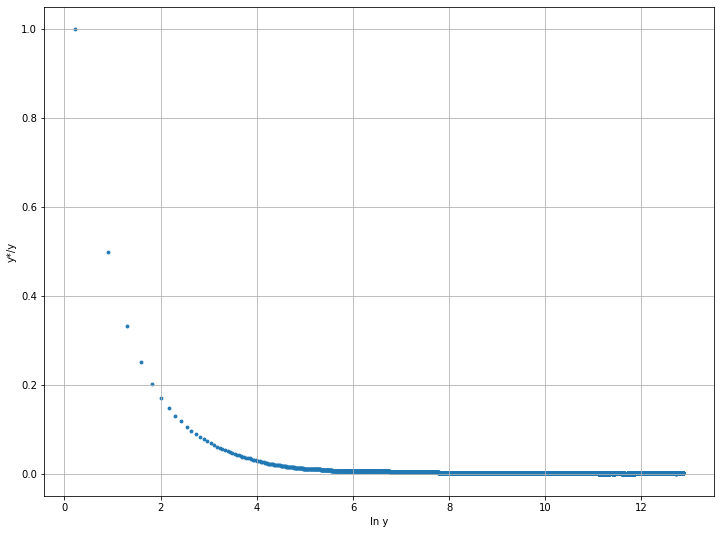

In [359]:
plt.figure(figsize=(12, 9))
plt.scatter(np.log(y_cumsum), disney.Close / y_cumsum, s=8)

plt.grid()
plt.xlabel('ln y')
plt.ylabel('y*/y');

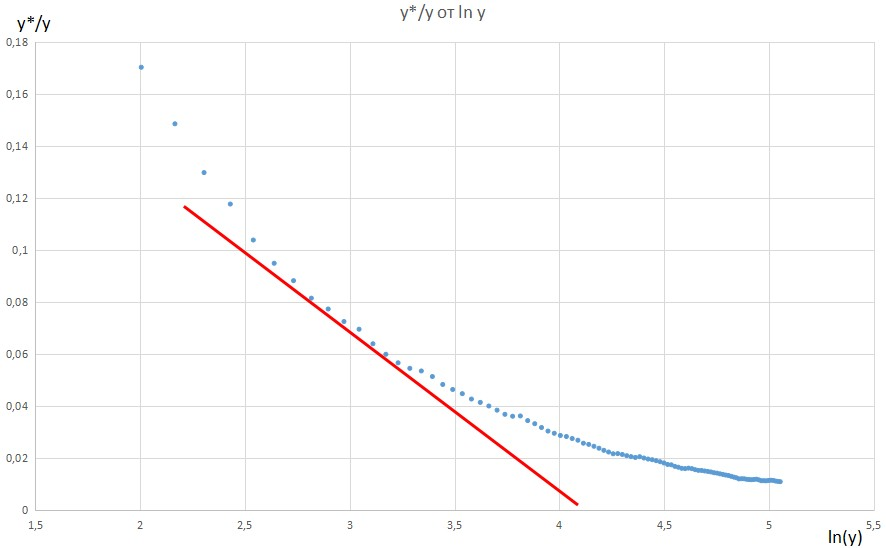

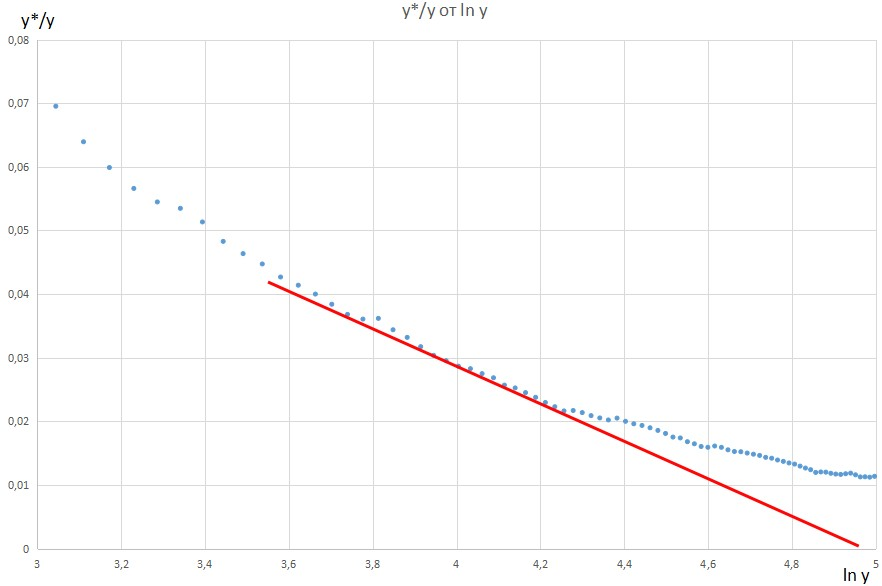

### 9-10 недели. Исключение тренда

<ipython-input-230-d52aa2d49b40>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disney['m'] = m


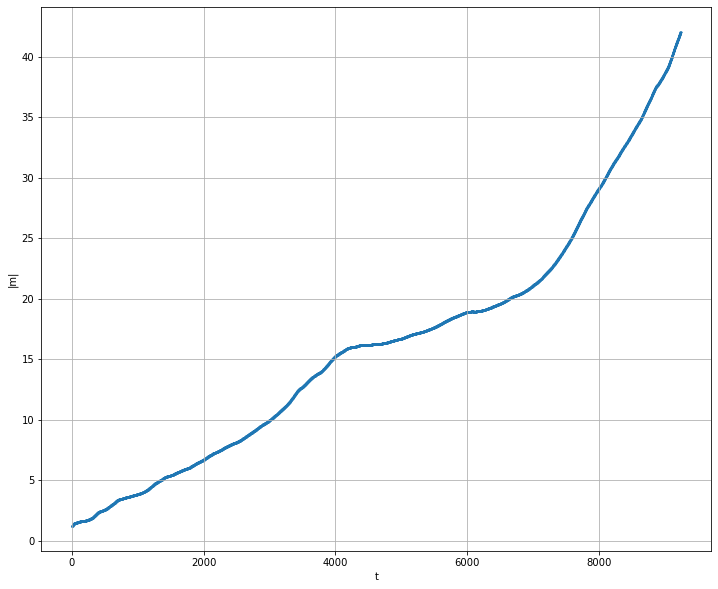

In [230]:
m = np.abs(y_cumsum / disney.t) 

disney['m'] = m
plt.figure(figsize=(12, 10))
plt.scatter(disney.t, m, s=1)
plt.grid()
plt.xlabel('t')
plt.ylabel('|m|');

In [231]:
tooltips = [('|m|', '@m'),
            ('t', '@t')]

fig = figure(x_axis_label = 't', y_axis_label = '|m|', plot_width=800, plot_height=650)
fig.add_tools(HoverTool(tooltips=tooltips))
fig.scatter(x='t', y='m', source=disney, legend_label="|m|", size=2)
show(fig)

In [232]:
delta_t = 240
# disney.Close.shift(delta_t) = y от (t - delta_t)
S = (disney.Close.shift(delta_t) + disney.Close.shift(-delta_t)) / (2 * disney.Close)
disney['ln_S'] = np.log(S)

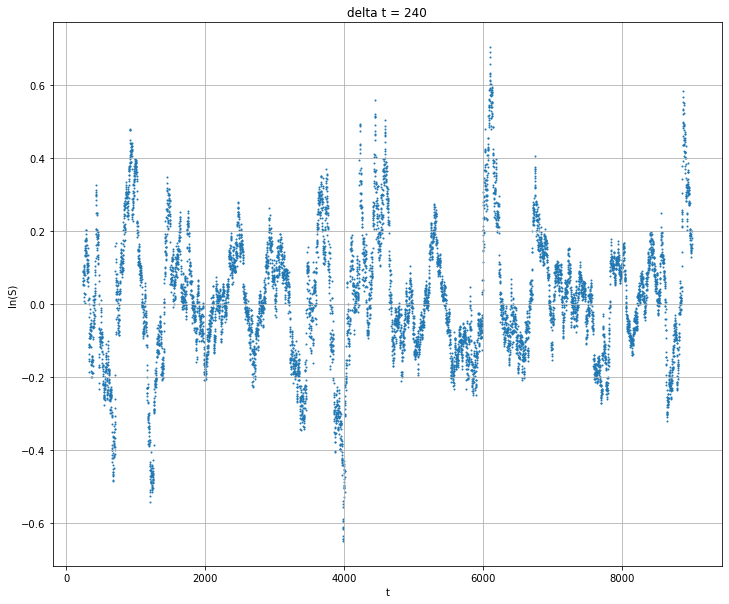

In [233]:
plt.figure(figsize=(12, 10))
plt.scatter(disney.t, disney.ln_S, s=1)
plt.grid()
plt.xlabel('t')
plt.ylabel('ln(S)')
plt.title('delta t = ' + str(delta_t));

In [234]:
tooltips = [('ln(S)', '@ln_S'),
            ('t', '@t')]

fig = figure(x_axis_label = 't', y_axis_label = 'ln(S)', plot_width=1000, plot_height=650)
fig.add_tools(HoverTool(tooltips=tooltips))
fig.scatter(x='t', y='ln_S', source=disney, legend_label="ln(S)", size=2)
show(fig)

In [235]:
P = (disney.Close.shift(delta_t) * disney.Close.shift(-delta_t)) / disney.Close**2
disney['ln_P'] = np.log(P)

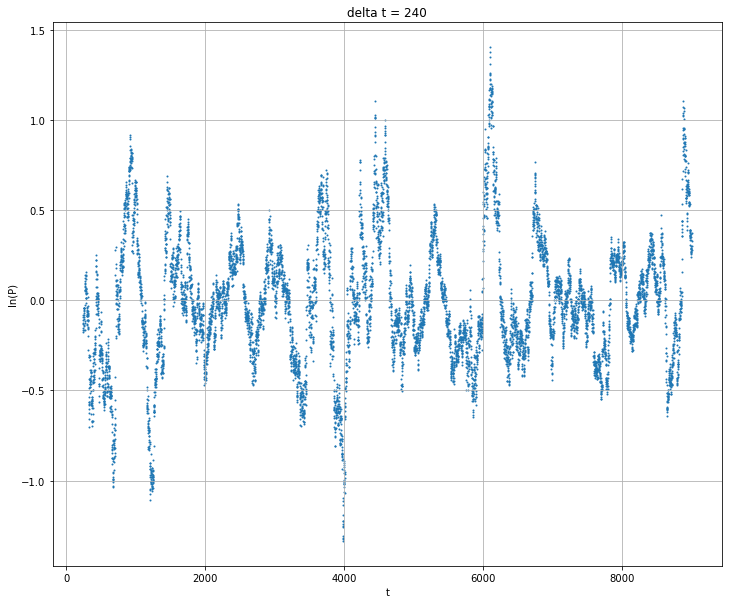

In [236]:
plt.figure(figsize=(12, 10))
plt.scatter(disney.t, disney.ln_P, s=1)
plt.grid()
plt.xlabel('t')
plt.ylabel('ln(P)')
plt.title('delta t = ' + str(delta_t));

In [237]:
tooltips = [('ln(P)', '@ln_P'),
            ('t', '@t')]

fig = figure(x_axis_label = 't', y_axis_label = 'ln(P)', plot_width=1000, plot_height=650)
fig.add_tools(HoverTool(tooltips=tooltips))
fig.scatter(x='t', y='ln_P', source=disney, legend_label="ln(P)", size=2)
show(fig)

In [238]:
n = disney.shape[0]
def get_p(delta):
    trend = disney.reset_index()
    a = np.array(trend.Close[:n - 2*delta])
    b = np.array(trend.Close[2 * delta:])
    c = np.array(trend.Close[delta:n - delta] **2)
    p = (a*b)/c
    return p

a_tau = [0] * (n-2)
p = get_p(delta_t)
length = len(p)

for tau in range(1, length - 2):
    a_tau[tau] = 1 / (length - tau) * np.sum(np.abs(p[tau + 1:length] - p[1:length - tau]))

In [344]:
borders = [0, 723, 1535, 2156, 2780, 3660, 4370, 5250, 6000, 6960, 7440, 8000]
borders_al = [0, 723, 5280, 5955]

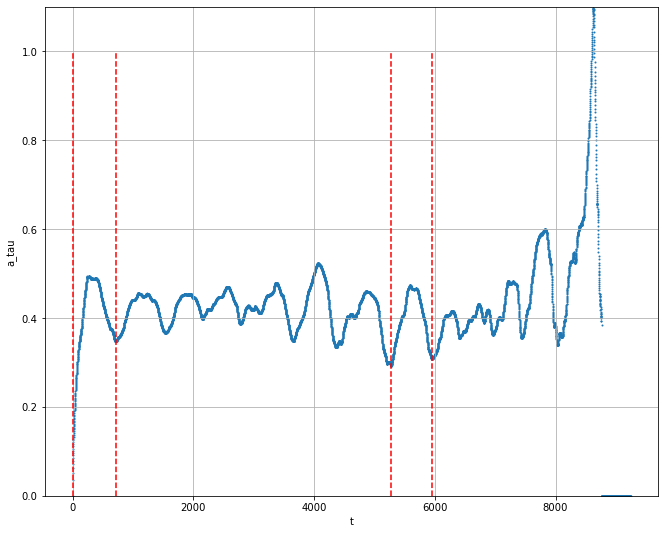

In [345]:
plt.figure(figsize=(11, 9))
plt.scatter(disney.t.iloc[:9241], a_tau, s=1)
plt.grid()
plt.xlabel('t')
plt.ylim(0, 1.1)
plt.ylabel('a_tau')
#plt.title('Альтер-Джонсон')
for border in borders_al:
    plt.vlines(border, 0, 1, color = 'r', linestyle='--');

In [332]:
disney['a_tau'] = [None] * n
disney.loc[:9240, 'a_tau'] = a_tau

In [333]:
tooltips = [('a_tau', '@a_tau'),
            ('t', '@t')]

fig = figure(x_axis_label = 't', y_axis_label = 'a_tau', plot_width=1000, plot_height=650)
fig.add_tools(HoverTool(tooltips=tooltips))
fig.scatter(x='t', y='a_tau', source=disney, legend_label="a_tau", size=2)
for border in borders:
    time_line = Span(location=border, dimension='height', line_color='red', line_dash='dashed', line_width=2)
    fig.add_layout(time_line)
    
show(fig)

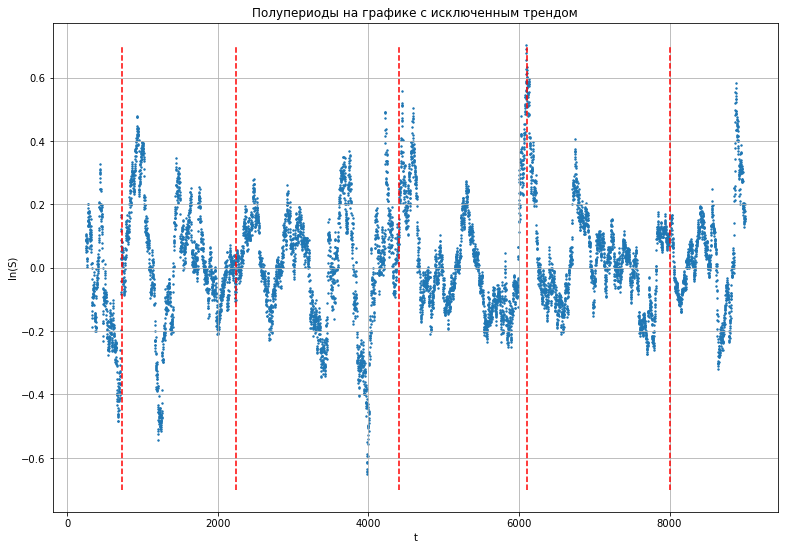

In [355]:
plt.figure(figsize=(13, 9))
plt.scatter(disney.t, disney.ln_S, s=2)
plt.grid()
plt.xlabel('t')
plt.ylabel('ln(S)')
plt.title('Полупериоды на графике с исключенным трендом')
for border in borders_semilog:
    plt.vlines(border, -0.7, 0.7, color = 'r', linestyle='--');

In [335]:
tooltips = [('ln(P)', '@ln_P'),
            ('t', '@t')]

fig = figure(x_axis_label = 't', y_axis_label = 'ln(P)', plot_width=1000, plot_height=650)
fig.add_tools(HoverTool(tooltips=tooltips))
fig.scatter(x='t', y='ln_P', source=disney, legend_label="ln(P)", size=2)
for border in borders:
    time_line = Span(location=border, dimension='height', line_color='red', line_dash='dashed', line_width=2)
    fig.add_layout(time_line)
show(fig)

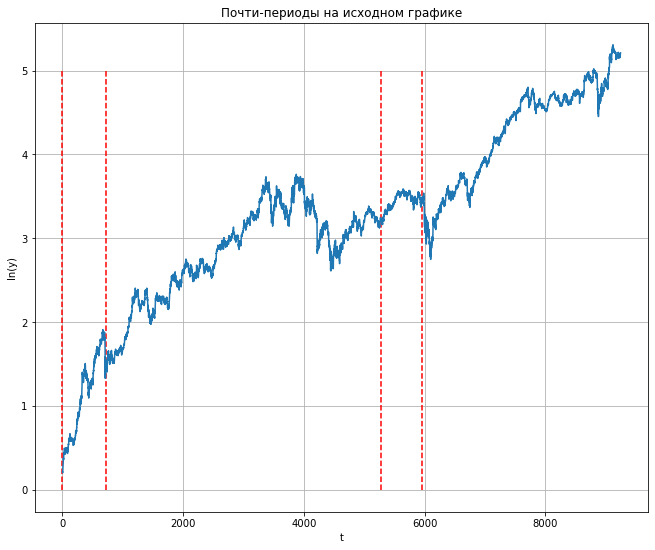

In [356]:
plt.figure(figsize=(11, 9))
plt.plot(disney.t, np.log(disney.Close))
plt.title('Почти-периоды на исходном графике')
plt.grid()
plt.xlabel('t')
plt.ylabel('ln(y)')
for border in borders_al:
    plt.vlines(border, 0, 5, color = 'r', linestyle='--');

In [337]:
borders_semilog = [723, 2244, 4400, 6100, 8000]

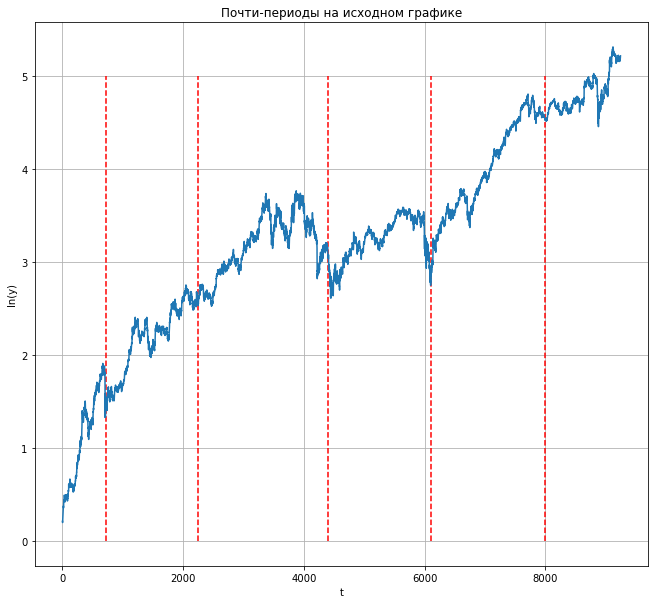

In [349]:
plt.figure(figsize=(11, 10))
plt.plot(disney.t, np.log(disney.Close))
plt.title('Почти-периоды на исходном графике')
plt.grid()
plt.xlabel('t')
plt.ylabel('ln(y)')
for border in borders_semilog:
    plt.vlines(border, 0, 5, color = 'r', linestyle='--');

положение 0 геометрической прогрессии:
0 = e^3 - (e^3 - 1) / 19 * 20

In [247]:
(6100-723) / 19 * 20

5660.0

In [248]:
polozhenie_0 = 6100 - 5660
polozhenie_0

440

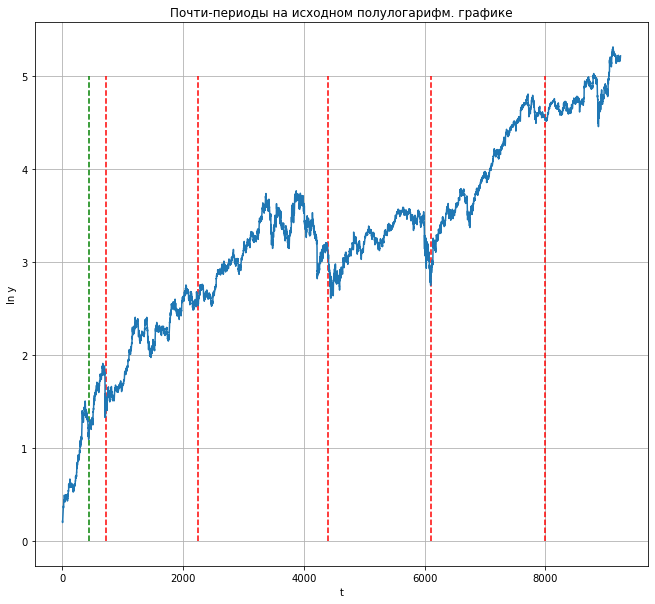

In [249]:
plt.figure(figsize=(11, 10))
plt.plot(disney.t, np.log(disney.Close))
plt.title('Почти-периоды на исходном полулогарифм. графике')
plt.grid()
for border in borders_semilog:
    plt.vlines(border, 0, 5, color = 'r', linestyle='--')
plt.vlines(polozhenie_0, 0, 5, color = 'g', linestyle='--')

plt.xlabel('t')
plt.ylabel('ln y');

In [250]:
borders_semilog = [723, 2244, 6100]

e^2 - 1 = Tk =

In [251]:
Tk = 2244 - 723
Tk

1521

In [252]:
Tk = (6100 - 2244)/2
Tk

1928.0

T(k-1) = 

In [253]:
Tk_1 = Tk / np.e
Tk_1

709.2715625785409

In [254]:
Tk_plus_1 = Tk * np.e
Tk_plus_1

5240.847365269039

In [255]:
tooltips = [('ln(y)', '@ln_y'),
            ('t', '@t')]

fig = figure(x_axis_label = 't', y_axis_label = 'ln(y)', plot_width=900, plot_height=740)
fig.add_tools(HoverTool(tooltips=tooltips))
fig.scatter(x='t', y='ln_y', source=disney, size=2)
    
time_line = Span(location=0, dimension='height', line_color='green', line_dash='dashed', line_width=2)
fig.add_layout(time_line)

for i in range(-3, 3):
    time_line = Span(location=i * Tk + 6100, dimension='height', line_color='black', line_dash='solid', line_width=2)
    fig.add_layout(time_line)
    
for i in range(-3, 14):
    time_line = Span(location=i * Tk_1 + 2244, dimension='height', line_color='blue', line_dash='dotted', line_width=2)
    fig.add_layout(time_line)
    
for i in range(-1, 2):
    time_line = Span(location=i * Tk_plus_1 + 6100, dimension='height', line_color='orange', line_dash='solid', line_width=2)
    fig.add_layout(time_line)
    
#time_line = Span(location=4602, dimension='height', line_color='black', line_dash='dotted', line_width=2)
fig.add_layout(time_line)
    
show(fig)

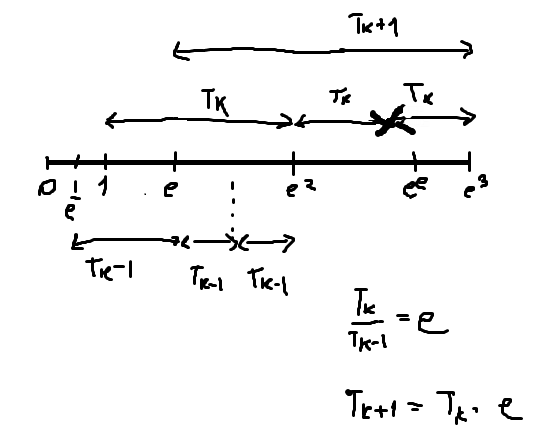

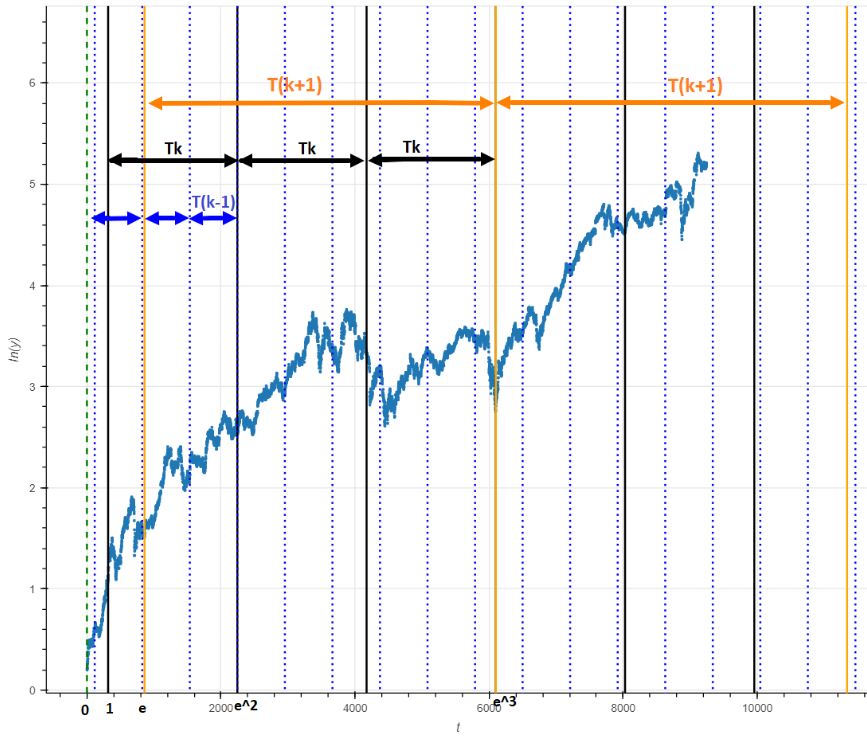